In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import scipy.stats as stats

In [47]:
import datetime
from scipy import optimize 
import functools 

def fvschedule(principal, schedule=[]):
    """
    Calculates future value with a variable interest rate schedule.
    """
    return functools.reduce(lambda x, y: x + (x * y), schedule, principal)

In [48]:
data = pd.read_csv('stockdata.csv', index_col=0)
df = pd.DataFrame(data)
df.head()

,NVDA,CR,XOM,GS,PCG
date,,,,,
1/23/2017,103.984764,67.996445,75.004539,222.075165,59.599167
1/24/2017,106.201210,70.195663,75.110458,223.039154,59.501442
1/25/2017,106.656372,71.026268,75.331146,226.446579,59.452583
1/26/2017,108.496826,70.412766,75.560638,228.670486,59.374409
1/27/2017,110.594505,70.176781,75.481201,226.160278,59.237598


In [49]:
CorrMatrix = data.corr()
print(CorrMatrix)

          NVDA        CR       XOM        GS       PCG
NVDA  1.000000  0.774285  0.258319  0.484005 -0.159201
CR    0.774285  1.000000  0.372209  0.393023 -0.311298
XOM   0.258319  0.372209  1.000000  0.186363  0.287913
GS    0.484005  0.393023  0.186363  1.000000  0.415223
PCG  -0.159201 -0.311298  0.287913  0.415223  1.000000


In [50]:
returns_NaN = df.pct_change()
returns = returns_NaN.drop(['1/23/2017'])
returns.head()

,NVDA,CR,XOM,GS,PCG
date,,,,,
1/24/2017,0.021315,0.032343,0.001412,0.004341,-0.001640
1/25/2017,0.004286,0.011833,0.002938,0.015277,-0.000821
1/26/2017,0.017256,-0.008638,0.003046,0.009821,-0.001315
1/27/2017,0.019334,-0.003351,-0.001051,-0.010977,-0.002304
1/30/2017,-0.015657,-0.006052,-0.007601,-0.012872,-0.000660


In [51]:
t_billData = pd.read_csv('tbill.csv',index_col = 0)
t_billData.head()

data_RF = t_billData['TBILL_RETURN']
risk_free_rate = (fvschedule(1,data_RF))**(1/3)-1
print(risk_free_rate*100)

1.658399386263354


In [52]:
n_assets = 5
companies = ['NVDA','CR','XOM','GS','PCG']
return_arr = []
for i in range(n_assets):
    expected_returns = fvschedule(1,returns[companies[i]])**(1/3)-1
    return_arr.append(expected_returns)
    
    print(expected_returns,companies[i])
print(return_arr)

corr = returns.corr()
print(corr)

cov = returns.cov()
print("Covariance Matrix","="*100)
print(cov)


0.3405029654386045 NVDA
0.07942835751740418 CR
-0.04018914530576445 XOM
0.028941282997861695 GS
-0.38697698112069834 PCG
[0.3405029654386045, 0.07942835751740418, -0.04018914530576445, 0.028941282997861695, -0.38697698112069834]
          NVDA        CR       XOM        GS       PCG
NVDA  1.000000  0.421046  0.317826  0.416574 -0.035310
CR    0.421046  1.000000  0.444526  0.506913  0.012640
XOM   0.317826  0.444526  1.000000  0.458980  0.069588
GS    0.416574  0.506913  0.458980  1.000000  0.042650
PCG  -0.035310  0.012640  0.069588  0.042650  1.000000
Covariance Matrix ====================================================================================================
          NVDA        CR       XOM        GS       PCG
NVDA  0.000747  0.000169  0.000096  0.000166 -0.000056
CR    0.000169  0.000217  0.000073  0.000109  0.000011
XOM   0.000096  0.000073  0.000123  0.000074  0.000045
GS    0.000166  0.000109  0.000074  0.000213  0.000036
PCG  -0.000056  0.000011  0.000045  0.000036  0

The following code will seek to create the equation that will calculate the portfio return:
$$
R_p = \sum_{i=1}^{N} W_i R_i
$$
i.e. the return of a portfolio is the weighted average of the returns of the individual stocks

In [53]:
weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)
print("")

print('Rebalance')
weights = weights/np.sum(weights)
print(weights, "Total=", round(np.sum(weights),3))
print("")
print(return_arr)
print("")

def port_returns(returns):
    portfolio_returns = ((weights * return_arr)*252)
    
    return portfolio_returns

print(port_returns(returns),'Expected Portfolio Returns @ these weights = ',round(np.sum(port_returns(returns)),4),"%")

Random Weights:
[0.70371024 0.5270378  0.48091996 0.64628965 0.46961475]

Rebalance
[0.24887435 0.18639233 0.17008228 0.22856697 0.16608408] Total= 1.0

[0.3405029654386045, 0.07942835751740418, -0.04018914530576445, 0.028941282997861695, -0.38697698112069834]

[ 21.35509837   3.73081874  -1.7225363    1.66698536 -16.19622018] Expected Portfolio Returns @ these weights =  8.8341 %


The following code will now seek to create the code that will model the equation to calculate the portfolio's variance, and therefore, the standard deviaton:

$$
\sqrt{{\sigma}^2 = \sum_{i=1}^{N} \sum_{i=1}^{N} w_i w_j \rho_{ij} {\sigma}_i {\sigma}_j}
$$



In [54]:
def port_std (returns):
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov, weights))) * np.sqrt(252)
    
    return portfolio_std

print(port_std(returns))

0.23862345036698662


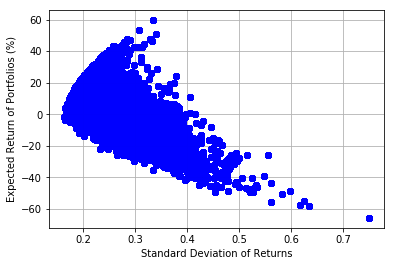

In [93]:
n_simulations = 5000
n_assets = 5
all_weights = []
ret_arr = []
vol_arr = []


for i in range(n_simulations):
    weights = np.array(np.random.random(n_assets))
    weights = weights/np.sum(weights)
    #indexing weights
    all_weights.append(weights)
    
    #indexing returns
    ret_arr.append(np.sum(port_returns(returns)))
    
    #indexing volatility
    vol_arr.append(port_std(returns))
        
    #print(all_weights,"weights", np.sum(all_weights))
    #print(ret_arr, "----> Returns ")
    #print(vol_arr, "----> Std ")
    
    plt.plot(vol_arr,ret_arr, 'o', color='Blue', alpha=0.4)
    plt.grid(True)
    plt.xlabel('Standard Deviation of Returns')
    plt.ylabel('Expected Return of Portfolios (%)')

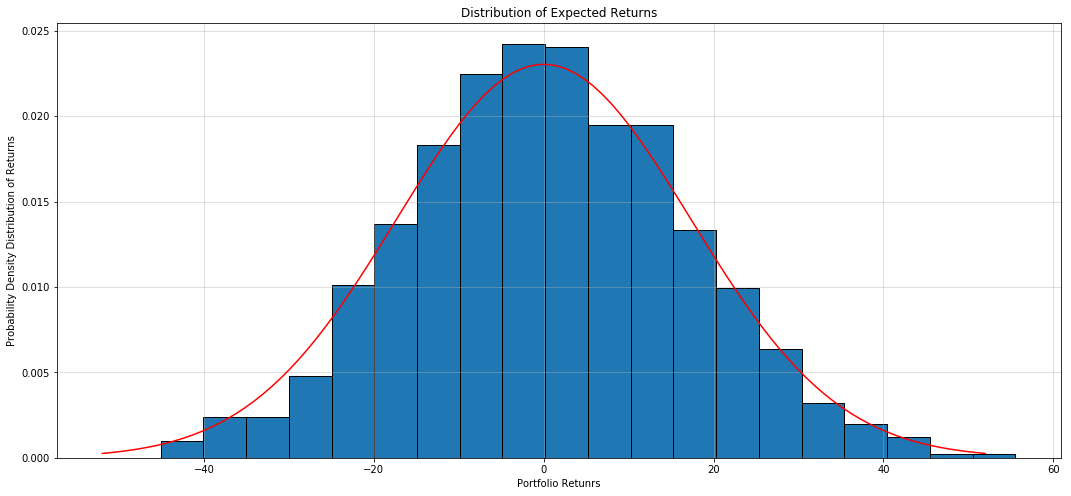

In [77]:
plt.figure(figsize=(18,8))
plt.hist(ret_arr, bins = 20, edgecolor = 'black', density=True)
plt.grid(True, alpha = 0.5)
plt.title('Distribution of Expected Returns')
plt.xlabel('Portfolio Retunrs')
plt.ylabel('Probability Density Distribution of Returns')

#normal distribution curve
mu = 0
variance = 300
sqrt = math.sqrt(variance)
x = np.linspace(mu - 3*sqrt, mu + 3*sqrt, 100)
plt.plot(x, stats.norm.pdf(x, mu, sqrt), color='red')

sm.qqplot(sp_returns)




THe formula for Sharpe Ratio is:

$$
S = \frac{R_p - R_{fr}}{{\sigma}^2}
$$


In [84]:
def sharpe_ratio(returns):
    sharpe = (np.sum(port_returns(returns))/100 - (risk_free_rate/100)) / port_std(returns)
    
    return sharpe

print(sharpe_ratio(returns))

1.4688263562891988


-1.0770035812328156


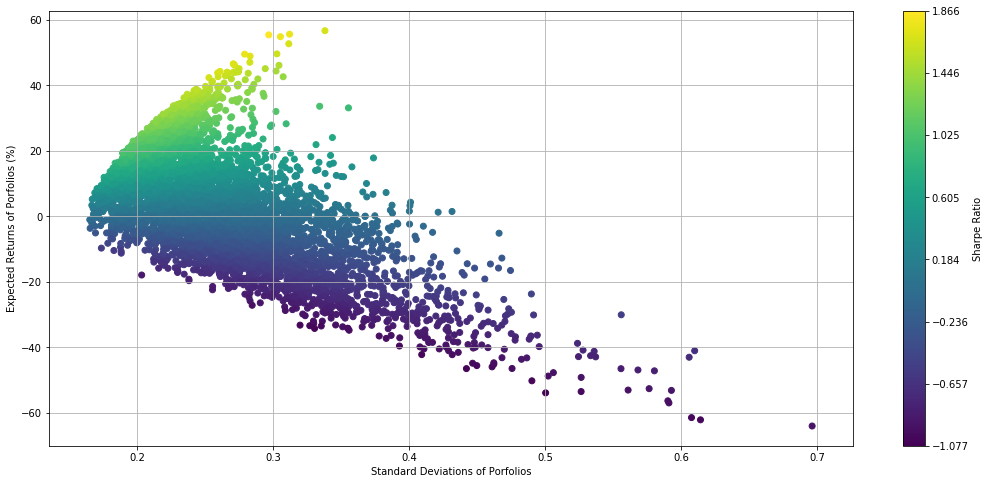

In [94]:
n_simulations = 5000
n_assets = 5
all_weights = []
ret_arr = []
vol_arr = []
shrp_arr = []


for i in range(n_simulations):
    weights = np.array(np.random.random(n_assets))
    weights = weights/np.sum(weights)
    #indexing weights
    all_weights.append(weights)
    
    #indexing returns
    ret_arr.append(np.sum(port_returns(returns)))
    
    #indexing volatility
    vol_arr.append(port_std(returns))
    
    #indexing sharpe
    shrp_arr.append(sharpe_ratio(returns))
    #print(all_weights,"weights", np.sum(all_weights))
    #print(ret_arr, "----> Returns ")
    #print(vol_arr, "----> Std ")
    #print(shrp_arr, "----> Sharpe Ratio")

print(min(shrp_arr))

plt.figure(figsize=(18,8))
plt.scatter(vol_arr,ret_arr,c=shrp_arr)
plt.grid(True)
plt.xlabel('Standard Deviations of Porfolios')
plt.ylabel('Expected Returns of Porfolios (%)')

v = np.linspace(min(shrp_arr),max(shrp_arr),8, endpoint=True)
plt.colorbar(label='Sharpe Ratio',ticks=v)

In [95]:
max_sharpe = np.argmax(shrp_arr)
print(max_sharpe)

1781


In [96]:
print(np.round(all_weights[max_sharpe],4))
print(np.round(ret_arr[max_sharpe],4),"%")

[0.5522 0.4003 0.0061 0.0389 0.0025]
55.371 %


Text(0.2966027760511314, 55.37099996036073, 'Max Sharpe Ratio')

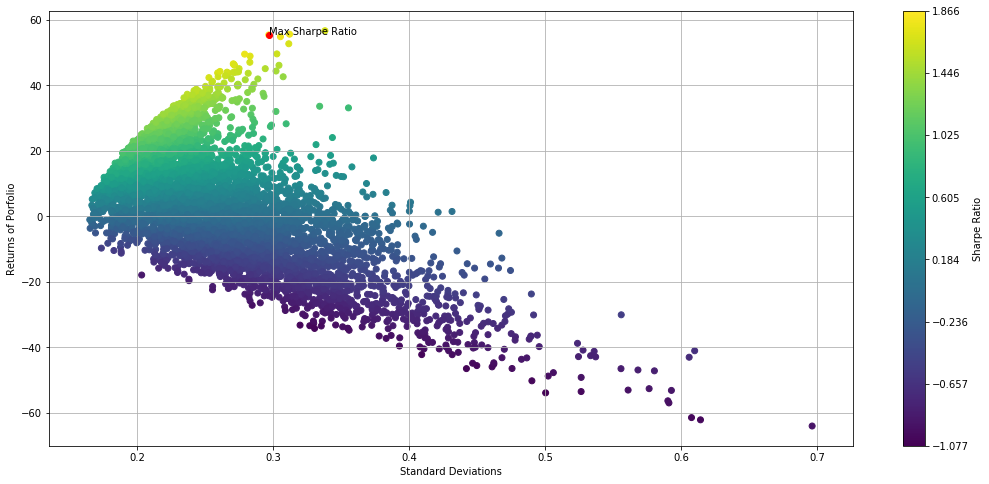

In [97]:
plt.figure(figsize=(18,8))
plt.scatter(vol_arr,ret_arr,c=shrp_arr)
plt.grid(True)
plt.xlabel('Standard Deviations')
plt.ylabel('Returns of Porfolio')
v = np.linspace(min(shrp_arr),max(shrp_arr),8, endpoint=True)
plt.colorbar(label='Sharpe Ratio',ticks=v)

plt.scatter(vol_arr[max_sharpe],ret_arr[max_sharpe], color="red")
plt.annotate('Max Sharpe Ratio',xy=(vol_arr[max_sharpe],ret_arr[max_sharpe]))